# The notebook is used to generate plots used in Chapter 3

In [2]:
# import packages
import pandas as pd
import numpy as np
import pickle
from veneer.pest_runtime import *
from veneer.manage import start,kill_all_now
import os

from funcs.read_data import variables_prep, file_settings
from funcs.modeling_funcs import vs_settings, \
        modeling_settings, paralell_vs, obtain_initials, change_param_values
from funcs.utils import timeseries_sum, update_bounds

In [3]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import spearmanr

mpl.rcParams['font.size'] = 16
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['text.usetex'] = False  # use latex for all text handling
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.format'] = 'png'  # gives best resolution plots
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['legend.fontsize'] = 16
# print mpl.rcParams.keys()
mpl.rcParams['text.latex.preamble'] = \
    r'\usepackage{siunitx}\usepackage{amsmath}\usepackage{amssymb}'

In [4]:
# Set the file to read
fpath = '../output/gp_run_1024/'
fname = 'ratio_cali_subreg.csv'


In [55]:
# import files for analysis
ratio_samples = pd.read_csv(fpath + fname)
ratio_samples['FullSpace'] = 100 * ratio_samples['FullSpace']
ratio_samples.tail()

,Unnamed: 0,Subregion,FullSpace,num_samples
62,62,0.250,11.55,1420
63,63,0.300,12.05,1460
64,64,0.225,12.33,1500
65,65,0.150,12.40,1540
66,66,0.250,12.72,1580


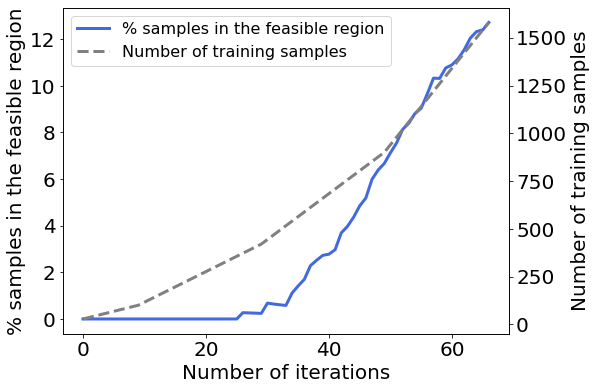

In [75]:
fig, ax = plt.subplots(figsize=(8, 6))
lns1 = ax.plot(ratio_samples['Unnamed: 0'], ratio_samples['FullSpace'], color='royalblue')
ax2 = ax.twinx()
lns2 = ax2.plot(ratio_samples['num_samples'], ls='--', color='grey')
ax.set_ylabel("% samples in the feasible region")
ax.set_xlabel('Number of iterations')
ax2.set_ylabel('Number of training samples')
plt.legend(lns1+lns2, ('% samples in the feasible region', 'Number of training samples'))
plt.savefig(f'{fpath}figs/ratio_training_samples.png', dpi=300)

## plot the ratio of feasible points

In [5]:
fdirs = [f'sampling-sa\fix_{i}_subreg' for i in ['rand', 'mean', 'max']]
fname = 'Proportion_optimal.csv'

In [ ]:
for fd in fdirs:
    